In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dados = fetch_openml(data_id=1523)

In [3]:
dados

{'data':             V1         V2         V3         V4          V5         V6
 0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400
 1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259
 2    68.832021  22.218482  50.092194  46.613539  105.985136  -3.530317
 3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523
 4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501
 ..         ...        ...        ...        ...         ...        ...
 305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395
 306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010
 307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880
 308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750
 309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249
 
 [310 rows x 6 columns],
 'target': 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 305    2
 306    2
 307    2
 

In [4]:
tabela_dados = pd.DataFrame(data=dados['data'])

In [5]:
tabela_dados.head()

,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [6]:
classes = {'1': 'Disk Hernia', '2': 'Normal', '3': 'Spondylolisthesis'}

In [7]:
tabela_dados['diagnostic'] = [classes[target] for target in dados.target]

In [8]:
tabela_dados.head()

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


In [9]:
tabela_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          310 non-null    float64
 1   V2          310 non-null    float64
 2   V3          310 non-null    float64
 3   V4          310 non-null    float64
 4   V5          310 non-null    float64
 5   V6          310 non-null    float64
 6   diagnostic  310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [10]:
# Media dos dados
tabela_dados.groupby('diagnostic').mean()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [11]:
tabela_dados.groupby('diagnostic').describe()

V1                                              \
                   count       mean        std        min        25%   
diagnostic                                                             
Disk Hernia         60.0  47.638407  10.697131  26.147921  41.018099   
Normal             100.0  51.685244  12.368161  30.741938  42.817849   
Spondylolisthesis  150.0  71.514224  15.109337  37.903910  60.658136   

                                                        V2             ...  \
                         50%        75%         max  count       mean  ...   
diagnostic                                                             ...   
Disk Hernia        46.416169  53.922329   74.433593   60.0  17.398795  ...   
Normal             50.123115  61.470097   89.834676  100.0  12.821414  ...   
Spondylolisthesis  72.149306  81.075893  129.834041  150.0  20.748038  ...   

                           V5                 V6                        \
                          75%         max  count       mean        std   
diagnostic                                                               
Disk Hernia        122.042999  137.540613   60.0   2.480251   5.531177   
Normal             129.040402  147.894637  100.0   2.186572   6.307483   
Spondylolisthesis  123.337307  163.071041  150.0  51.896687  40.108030   

                                                                           
                         min        25%        50%        75%         max  
diagnostic                                                                 
Disk Hernia       -10.675871  -0.910818   2.542441   6.059666   15.779697  
Normal            -11.058179  -1.511360   1.152710   4.968807   31.172767  
Spondylolisthesis   1.010041  30.393271  42.372509  61.894425  418.543082  

[3 rows x 48 columns]

In [12]:
# Removendo outlier
tabela_dados.drop(tabela_dados.loc[tabela_dados['V6'] > 400].index, inplace=True)

In [13]:
tabela_dados.loc[tabela_dados['V6'] > 400]

,V1,V2,V3,V4,V5,V6,diagnostic


In [14]:
# Separação dos dados
x = tabela_dados.drop(columns=['diagnostic'])
y = tabela_dados['diagnostic']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [16]:
# Normalizando dados
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
set(tabela_dados['diagnostic'])

{'Disk Hernia', 'Normal', 'Spondylolisthesis'}

In [18]:
# Criando o modelo
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

modelo_classificador.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Predição sem escalonamento
y_predito = modelo_classificador.predict(x_test_scaled)

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                  y_pred = y_predito,
                                  labels = ['Disk Hernia', 'Normal', 'Spondylolisthesis'])

<Figure size 1080x360 with 0 Axes>

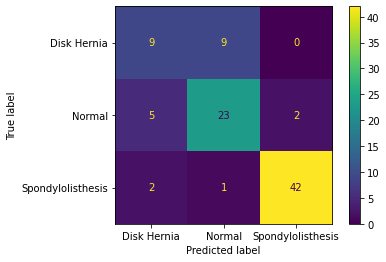

In [22]:
# Plotando a matriz de confusao
figure = plt.figure(figsize=(15,5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels=['Disk Hernia', 'Normal', 'Spondylolisthesis'])
disp.plot(values_format='d')

In [23]:
print(classification_report(y_test, y_predito))

                   precision    recall  f1-score   support

      Disk Hernia       0.56      0.50      0.53        18
           Normal       0.70      0.77      0.73        30
Spondylolisthesis       0.95      0.93      0.94        45

         accuracy                           0.80        93
        macro avg       0.74      0.73      0.73        93
     weighted avg       0.80      0.80      0.79        93



In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print(round(accuracy_score(y_test, y_predito), 2))

0.8


In [26]:
# Fazer a validacao dos melhores hiperparametros pro modelo de ML
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [27]:
kfold = KFold(n_splits=5, shuffle=True)
result = cross_val_score(modelo_classificador, x, y, cv = kfold)
print('K-Fold (R^2) Scores: ', result)
print('Media R^2 para Cross-Validation: ', result.mean())

K-Fold (R^2) Scores:  [0.82258065 0.83870968 0.82258065 0.79032258 0.8852459 ]
Media R^2 para Cross-Validation:  0.8318878900052882


Escolhendo os melhores hiperparâmetros com validação cruzada:

In [28]:
from sklearn.model_selection import GridSearchCV # metodo para selecao dos melhores parametros
from sklearn.metrics import make_scorer, accuracy_score, f1_score # metricas de validação

In [29]:
error = [] # Armazenar erros

# Calculando erro para K entre 1 e 15:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error.append(np.mean(pred_i != y_test))

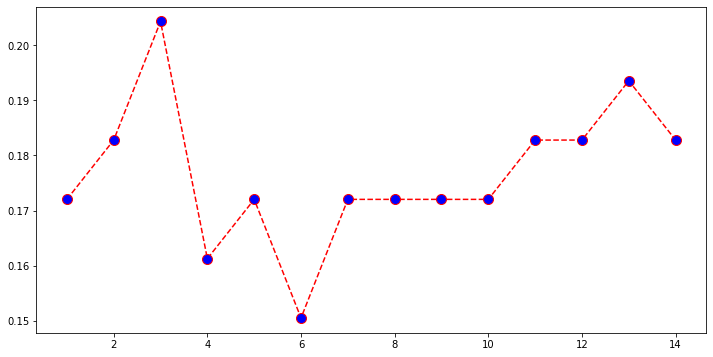

In [30]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)

In [31]:
param_grid = {'n_neighbors':[8,14], # total de vizinhos
             'weights': ['uniform', 'distance'], #Função de peso usada na previsao
             'metric': ['cosine', 'euclidean', 'manhattan']} # metrica para calculo

In [32]:
# Metrica de desempenho = melhor acuracia
gs_metric = make_scorer(accuracy_score, greater_is_better=True)

In [33]:
grid = GridSearchCV(KNeighborsClassifier(),
                   param_grid=param_grid,
                   scoring=gs_metric,
                   cv=5,n_jobs=4,verbose=3) #cv gerador da validação cruzada

In [34]:
grid.fit(x_train_scaled,y_train) #Selecionando os melhores hiperparamentos
knn_params = grid.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
KNN {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}


In [35]:
grid.cv_results_

{'mean_fit_time': array([0.00489926, 0.00226116, 0.00030208, 0.00240011, 0.00198307,
        0.00261717, 0.00091   , 0.00110807, 0.00120468, 0.00136237,
        0.00171494, 0.00070214]),
 'std_fit_time': array([0.00400232, 0.00277032, 0.00060415, 0.00300183, 0.00188942,
        0.00345386, 0.00081033, 0.00175579, 0.00147543, 0.00171187,
        0.00318217, 0.00140429]),
 'mean_score_time': array([0.00392556, 0.00326433, 0.00694866, 0.0022109 , 0.0068409 ,
        0.00202174, 0.00786695, 0.00359592, 0.00682311, 0.00203848,
        0.00712166, 0.00534062]),
 'std_score_time': array([0.00325321, 0.00195565, 0.00358627, 0.00195147, 0.00121691,
        0.00333083, 0.00190282, 0.00189636, 0.00372945, 0.00312469,
        0.0016254 , 0.00328117]),
 'param_metric': masked_array(data=['cosine', 'cosine', 'cosine', 'cosine', 'euclidean',
                    'euclidean', 'euclidean', 'euclidean', 'manhattan',
                    'manhattan', 'manhattan', 'manhattan'],
              mask=[False, Fa

Testando varios tipos de algoritmo de classificação:

In [36]:
def AplicaValidacaoCruzada(x_axis, y_axis):
    #Linear models
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    #Cross-Validation models
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    #Configurando KFold
    kfold = KFold(n_splits=10, shuffle=True)
    #Axis
    x = x_axis
    y = y_axis
    #Criando modelos
    #KNN
    knn = KNeighborsClassifier(n_neighbors=14, metric='manhattan',weights='uniform')
    knn.fit(x,y)
    #SVM
    svm = SVC()
    svm.fit(x,y)
    #Random Forest
    rf = RandomForestClassifier(random_state=7)
    rf.fit(x,y)
    #Aplicando KFold
    knn_result = cross_val_score(knn,x,y,cv=kfold)
    svm_result = cross_val_score(svm,x,y,cv=kfold)
    rf_result = cross_val_score(rf,x,y,cv=kfold)
    #Cria dicionario para guardar modelos lineares
    dic_models = {'KNN': knn_result.mean(),'SVM': svm_result.mean(), 'RF': rf_result.mean()}
    #Seleciona o melhor modelo
    melhor_modelo = max(dic_models, key=dic_models.get)
    
    print('KNN (R^2):', knn_result.mean())
    print('SVM (R^2):', svm_result.mean())
    print('RF (R^2):', rf_result.mean())
    print('O melhor modelo é: {0} com valor: {1}'.format(melhor_modelo, dic_models[melhor_modelo]))

In [37]:
AplicaValidacaoCruzada(x,y)

KNN (R^2): 0.8250537634408601
SVM (R^2): 0.8544086021505377
RF (R^2): 0.8350537634408601
O melhor modelo é: SVM com valor: 0.8544086021505377
